In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns


In [3]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1":V1,
                   "V2":V2,
                   "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [4]:
#Hızlı Çözüm

In [5]:
#eksik değerlere erişmek
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [6]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [7]:
df.isnull().sum().sum()

7

In [8]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [9]:
df[df.isnull().any(axis = 1)] # en az bir eksik gözlem birimi bulunan satırları getirdik

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [10]:
df[df.notnull().all(axis = 1)] #boş olmayanları getir 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [11]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [12]:
#Eksik Gözlemlerin Direk Silinmesi

In [13]:
df_deneme = df.dropna(inplace = True)#direk silinirler kalıcı silmek içinde inplace

In [14]:
#basit değer atama 

In [15]:
df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [16]:
df["V1"].mean()

9.25

In [17]:
df["V1"].fillna(df["V1"].mean())

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [18]:
df["V1"].fillna(5)

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [19]:
#apply ve lambda ile dolduruz

In [20]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)#apply döngü işlemi yapar
#burdaki x her bir sütunu ifade eder

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [21]:
#Eksik Veri Yapısının Görselleştirilmesi

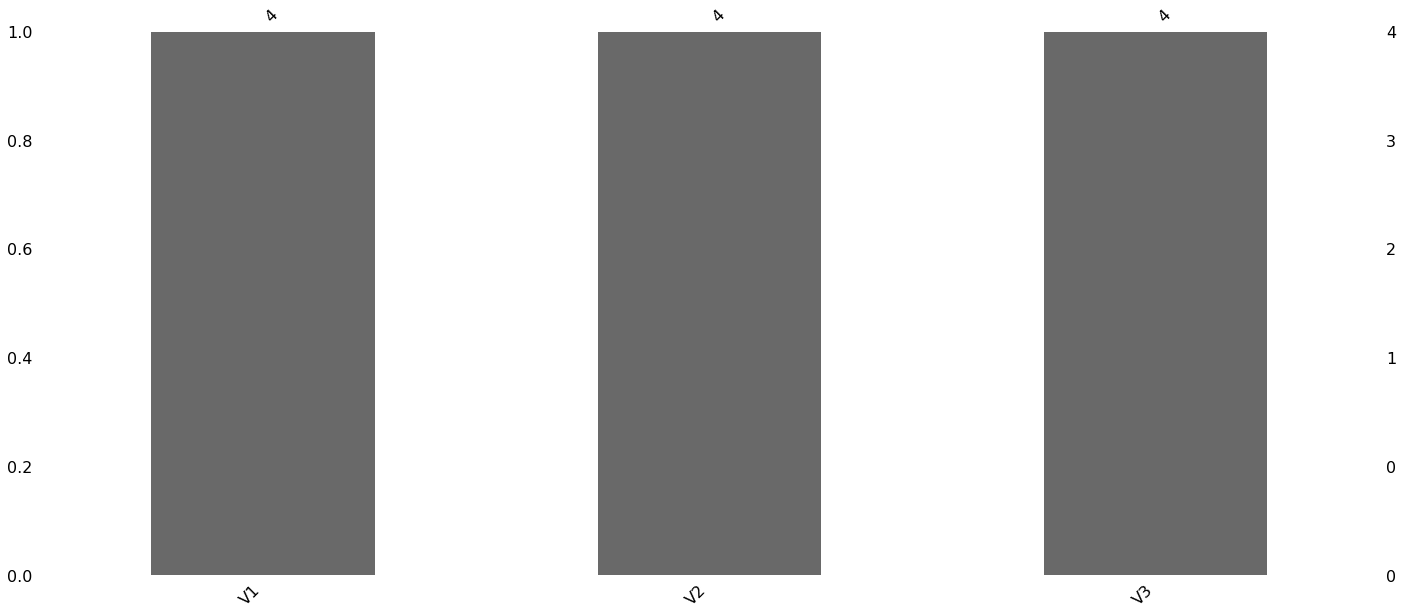

In [22]:
msno.bar(df);#değişkenlerdeki eksiklikleri bu kütüphane ifade eder

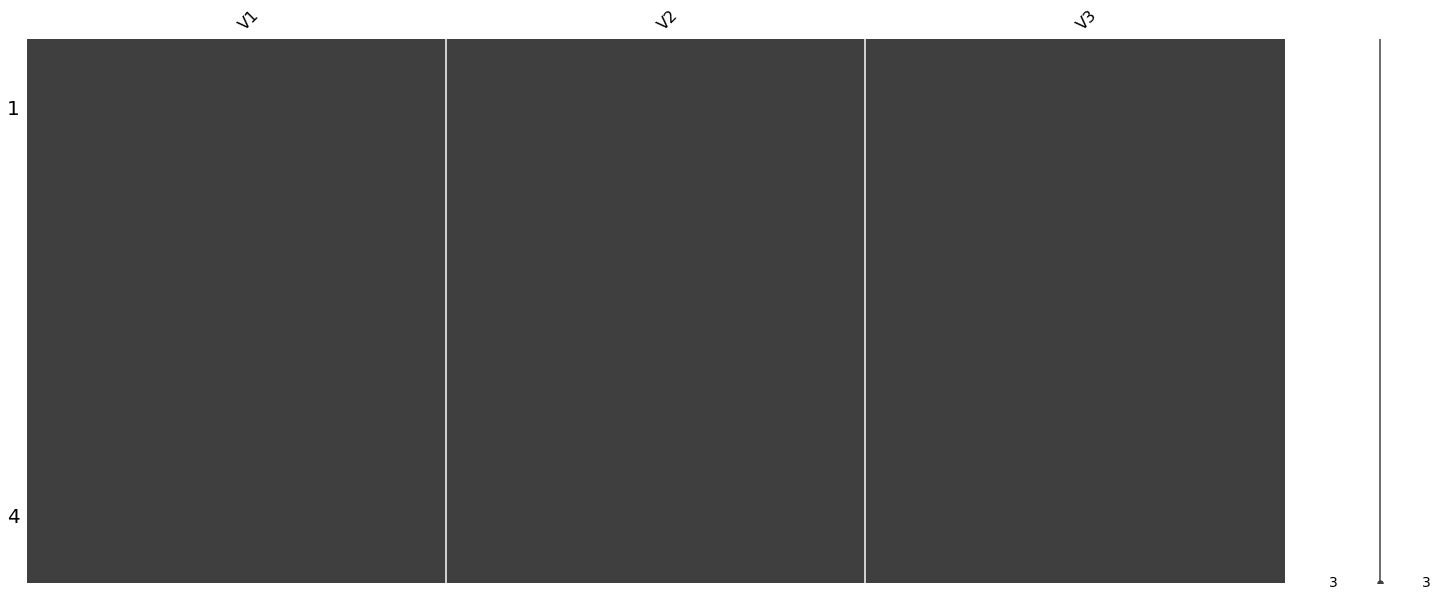

In [23]:
msno.matrix(df);#bu grafikte eksik değerlerin rasallığıyla ilgili yapısal bozukluğunu yakalama için lazım olan bir grafik

In [24]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [25]:
df.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

<AxesSubplot:>

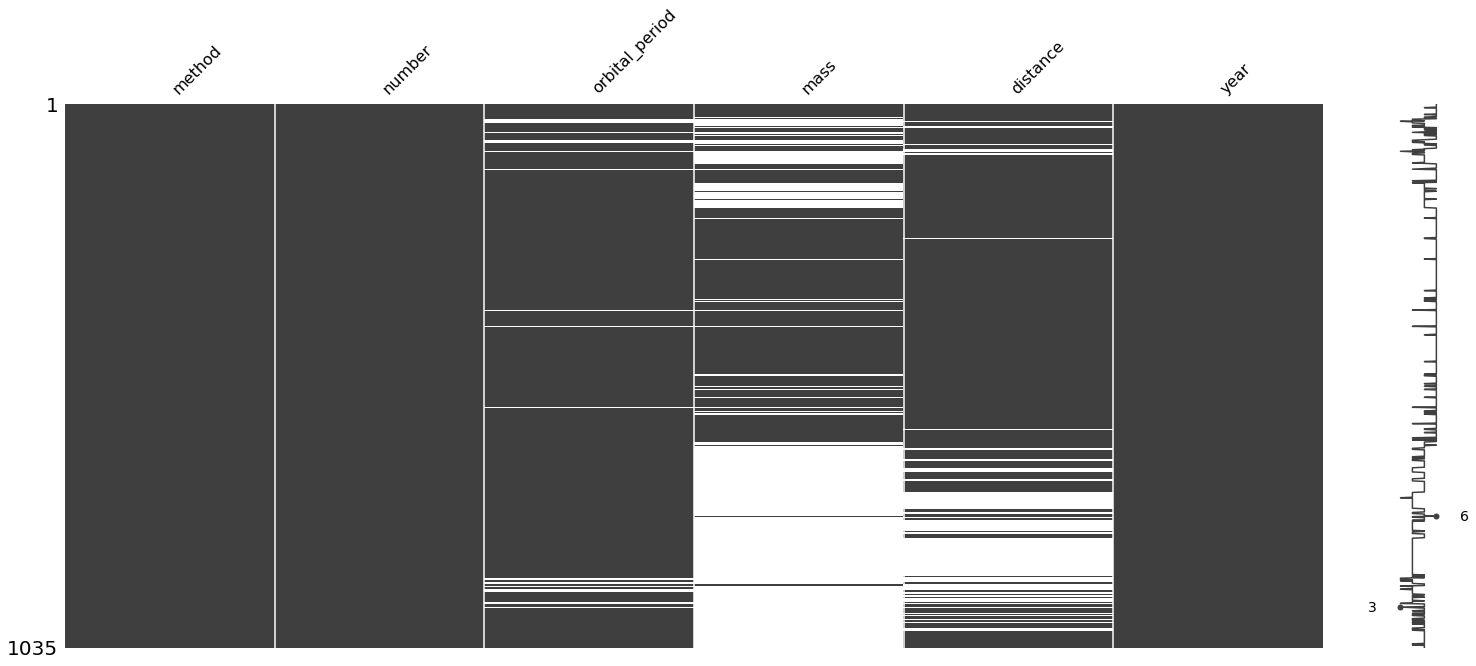

In [26]:
msno.matrix(planets)

In [27]:
#aynı anda 6 tane dolu olma durumu 
#aynı anda 3 tane boş olma durumu görülmüştür
#orbitalperiod'u olmayanın mass'ide yok demekki bağlı

<AxesSubplot:>

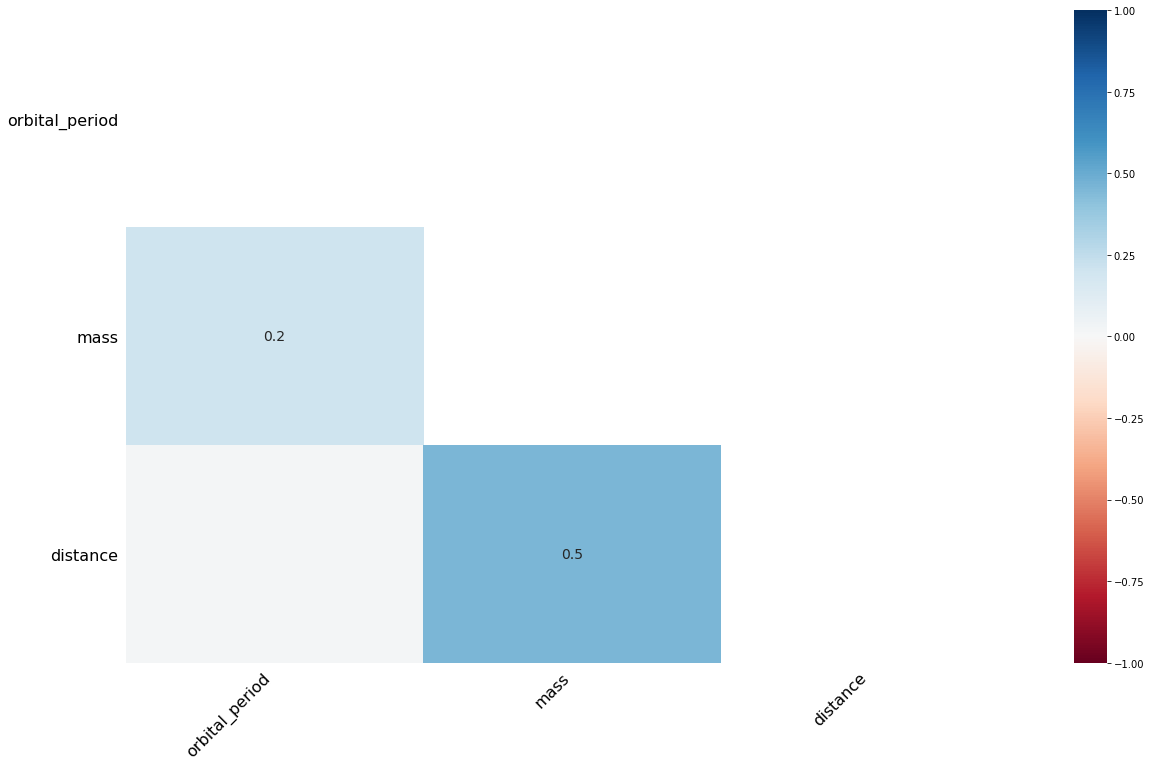

In [28]:
msno.heatmap(planets)

In [29]:
#eksiklik korelasyon değerinin ısı haritası

In [30]:
#distance ile mass arasında 0.5 korelasyon vardır
#yüzde 50 şeklinde distancede olan eksiklik mass tada vardır

In [31]:
#SİLME YÖNTEMLERİ

In [32]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1":V1,
                   "V2":V2,
                   "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [33]:
#1-) EN AZ BİR EKSİK İÇERENLERİN SİLİNMESİ

In [34]:
df.dropna()#gözlemler için

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [35]:
#2-) TÜM DEĞERLERİ EKSİK OLANLARIN SİLİNMESİ

In [36]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [37]:
df.dropna(axis = 1)# değişkenler için

""
0
1
2
3
4
5
6
7
8


In [38]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [39]:
#BASİT DEĞER ATAMA YÖNTEMLERİ

In [40]:
#1-) SAYISAL DEĞİŞKENLERDE ATAMA

In [41]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [42]:
#Tüm değişkenler için
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [43]:
#ikinci yol
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [44]:
#durum v1de homojen diğerlerinde çarpık ise ne yapacağız ?

In [45]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [46]:
df.fillna(df.median()["V3":])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [47]:
#Üçüncü yol

In [48]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [49]:
#2-) KATEGORİK DEĞİŞKEN KIRILMINDA DEĞER ATAMA

In [50]:
#bir çalışanın maaş değişkeninde eksiklik var
#ya silmek yada ortalamayla doldurmak
#bölüm bölüm değerleri alarak atamalayız bunada kategorik değişken kırılımı denir

In [51]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df = pd.DataFrame({"maas":V1,
                   "V2":V2,
                   "V3":V3,
                   "departman":V4})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [52]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [53]:
df.groupby("departman")["maas"].mean().IK

4.666666666666667

In [54]:
df["maas"] = df["maas"].fillna(
                df.groupby("departman")["maas"]
                .transform("mean"))
#çıkan IK VE IT ortalamalarını naler yerine doldurdu

In [55]:
df

,maas,V2,V3,departman
0,1.000000,7.0,NaN,IT
1,3.000000,NaN,12.0,IT
2,6.000000,5.0,5.0,IK
3,4.666667,8.0,6.0,IK
4,7.000000,12.0,14.0,IK
5,1.000000,NaN,7.0,IK
6,4.666667,NaN,NaN,IK
7,9.000000,2.0,2.0,IT
8,15.000000,3.0,31.0,IT


In [56]:
#3-) KATEGORİK DEĞİŞKENLER İÇİN DEĞER ATAMA

In [57]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"], dtype = object)

df = pd.DataFrame({"maas":V1,
                   "departman":V4})
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [58]:
df["departman"].mode()

0    IK
dtype: object

In [59]:
df["departman"].fillna(df["departman"].mode()[0], inplace = True)

In [60]:
df["departman"].fillna(method = "bfill")#kendisinden sonra gelenle doldurur

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [61]:
df["departman"].fillna(method = "ffill")#önceki değerle değiştirme

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [62]:
#Tahmine Dayalı Değer Atama - KNN & Random Forests & EM

In [63]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [64]:
#KNN

In [65]:
from ycimpute.imputer import knnimput

In [66]:
var_names = list(df)

In [67]:
n_df = np.array(df)

In [68]:
n_df# array e çevirldi

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [69]:
df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [70]:
dff = knnimput.KNN(k = 4).complete(n_df)
# k burada komşuluk sayısnı belirtir

Imputing row 1/891 with 0 missing, elapsed time: 0.150
Imputing row 101/891 with 0 missing, elapsed time: 0.152
Imputing row 201/891 with 0 missing, elapsed time: 0.153
Imputing row 301/891 with 1 missing, elapsed time: 0.155
Imputing row 401/891 with 0 missing, elapsed time: 0.156
Imputing row 501/891 with 0 missing, elapsed time: 0.157
Imputing row 601/891 with 0 missing, elapsed time: 0.158
Imputing row 701/891 with 0 missing, elapsed time: 0.159
Imputing row 801/891 with 0 missing, elapsed time: 0.160


In [71]:
dff # bir numpy arrayi bunu dataframeye çevir

array([[ 0.        ,  3.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 1.        ,  3.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 0.        ,  3.        , 22.46902398,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 0.        ,  3.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

In [72]:
dff = pd.DataFrame(dff, columns = var_names)

In [73]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,22.469024,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [74]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [75]:
#Random Forests

In [76]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [77]:
var_names = list(df)
n_df = np.array(df)

In [78]:
from ycimpute.imputer import iterforest

In [79]:
dff = iterforest.IterImput().complete(n_df)

In [80]:
dff = pd.DataFrame(dff, columns = var_names)
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000,1.0,0.0,7.2500
1,1.0,1.0,38.000,1.0,0.0,71.2833
2,1.0,3.0,26.000,0.0,0.0,7.9250
3,1.0,1.0,35.000,1.0,0.0,53.1000
4,0.0,3.0,35.000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000,0.0,0.0,13.0000
887,1.0,1.0,19.000,0.0,0.0,30.0000
888,0.0,3.0,26.843,1.0,2.0,23.4500
889,1.0,1.0,26.000,0.0,0.0,30.0000


In [81]:
#EM

In [82]:
from ycimpute.imputer import EM

In [83]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [84]:
var_names = list(df)
n_df = np.array(df)

In [85]:
dff = EM().complete(n_df)

In [86]:
dff = pd.DataFrame(dff, columns = var_names)
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,23.301512,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000
